# Audio Processing in Python



# Some Terminologies

Before starting, let us understand some terminologies related to audio and signal processing which will help in understanding and following this notebook in a better way.

* Analog speech signal : The speech which usually is uttered by humans and is propogated through air.
* Digital speech signal : The speech (in terms of samples) after performing analog-to-digital conversion using an ADC device. In this form, speech signal is in form of digitized samples.
* Frequency of a signal : The number of cycles a signal repeats in 1 second duration.
* Amplitude of a signal : It is related to loudness of speech (for speech signal). Depending on the type of the signal, it can be energy, voltage etc.

### Processing a Noisy and Clean Signal

- There are two noisy and clean signals in the same folder
- Generate MFCC of both the Signals and report the differences 

In [43]:
import os
import numpy as np
import librosa, librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [37]:
main_path = '/Users/praneethsai/Documents/projects/ML-fundamentals/Week 3/Audio Processing/Data'
sounds = [] ; labels = [] ; soundpaths = [] ; srs = [] # sampling rates
for soundfile in os.listdir(main_path):
    soundpath = os.path.join(main_path, soundfile)
    sound, sr = librosa.load(soundpath)
    srs.append(sr)
    soundpaths.append(soundpath)
    sounds.append(sound)
    labels.append(soundfile.strip('.wav'))


In [38]:
print(f'{labels[0]}')
ipd.Audio(soundpaths[0])

Noisy-Signal


In [39]:
print(f'{labels[1]}')
ipd.Audio(soundpaths[1])

Clean-Signal


Text(0.5, 1.0, 'Clean-Signal sound')

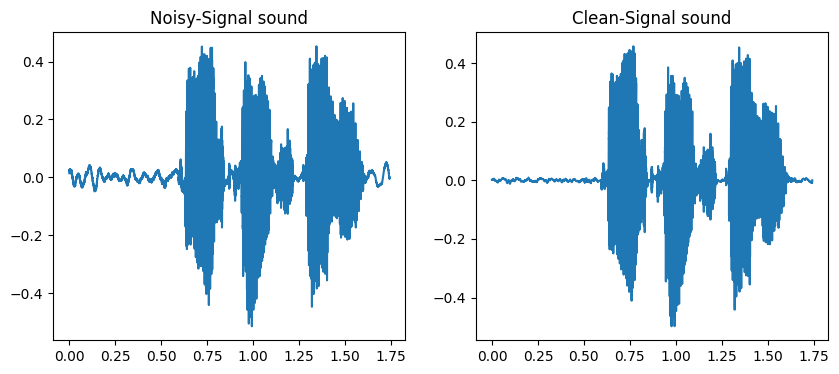

In [90]:
# sounds
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
time_max = len(sounds[1])/sr
time_axis = np.linspace(0, time_max, len(sounds[1]))
axes[0].plot(time_axis, sounds[0])
axes[0].set_title(f'{labels[0]} sound')
axes[1].plot(time_axis, sounds[1])
axes[1].set_title(f'{labels[1]} sound')

Text(0.5, 1.0, 'Fourier Transform of signals')

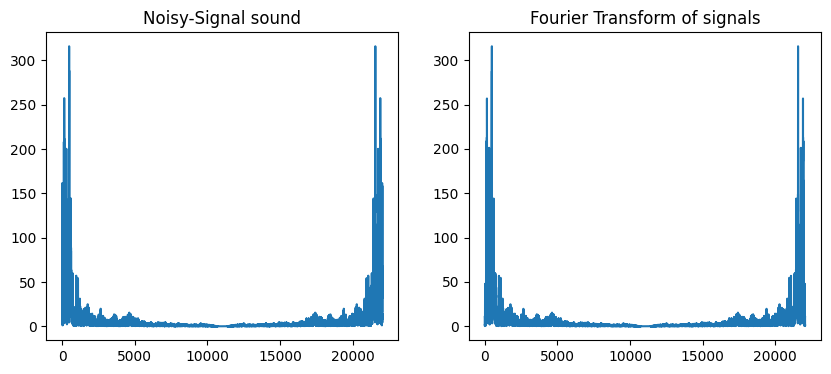

In [107]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
FFT_noisy = np.fft.fft(sounds[0])
X_mag = np.absolute(FFT_noisy)
f = np.linspace(0, _, len(X_mag))
axes[0].plot(f, X_mag)
axes[0].set_title(f'{labels[0]} sound')

FFT_clear = np.fft.fft(sounds[1])
X_mag = np.absolute(FFT_clear)
axes[1].plot(f, X_mag)
axes[1].set_title(f'{labels[1]} sound')

plt.title('Fourier Transform of signals')


In [41]:
# MFCC OF NOISY SIGNAL AND CLEAN SIGNAL
sounds_ = np.array(sounds[:2])
mfcc_noisy_sound = librosa.feature.mfcc(y = sounds_[0])
mfcc_clean_sound = librosa.feature.mfcc(y = sounds_[1])

In [42]:
print(mfcc_clean_sound.shape) ; print(mfcc_noisy_sound.shape)

(20, 75)
(20, 75)


In [ ]:
# There are 20 coeffecients in with change of those
# coeffcients over time at 75 points.

Text(0, 0.5, 'Frequncies')

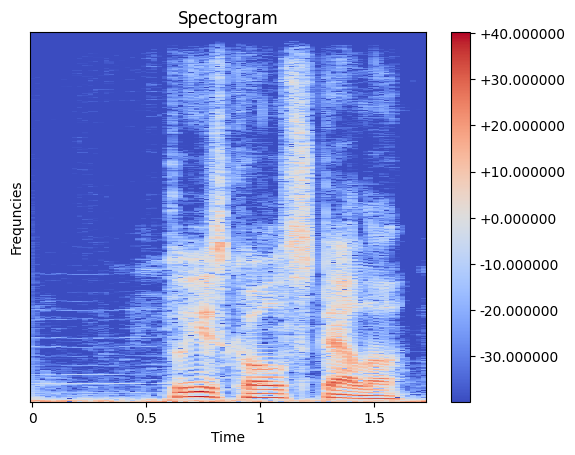

In [119]:
# Spectogram of noisy sound
spectogram= librosa.amplitude_to_db(np.absolute(librosa.stft(sounds[0])))
librosa.display.specshow(spectogram, x_axis='time')
plt.colorbar(format='%+2f')
plt.title('Spectogram')
plt.ylabel('Frequncies')

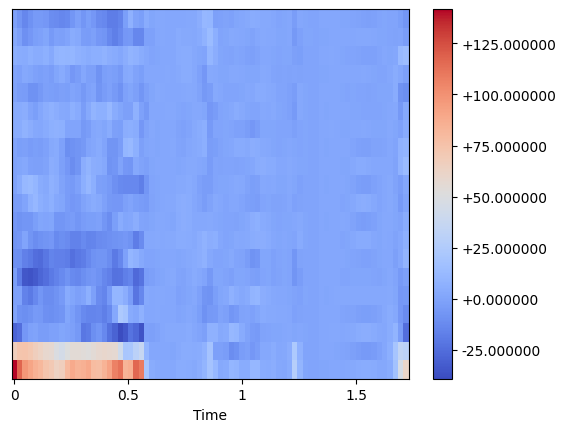

In [54]:
librosa.display.specshow(mfcc_noisy_sound - mfcc_clean_sound, x_axis='time')
plt.colorbar(format='%+2f')



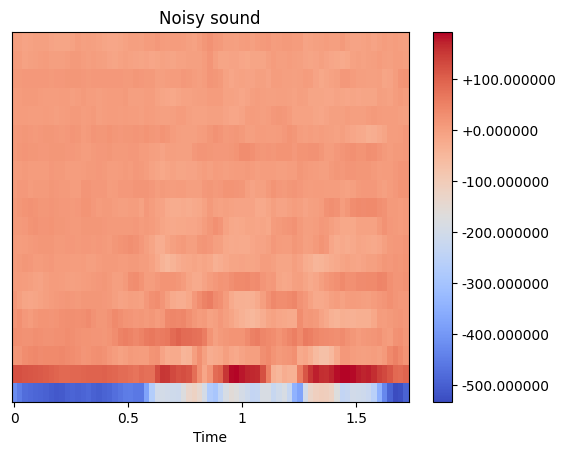

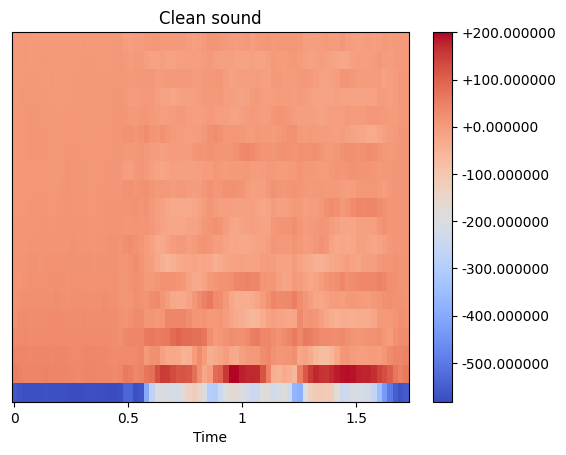

In [55]:
librosa.display.specshow(mfcc_noisy_sound, x_axis='time',sr = srs[0])
plt.title('Noisy sound')
plt.colorbar(format='%+2f')
plt.show()
librosa.display.specshow(mfcc_clean_sound, x_axis='time',sr = srs[1])
plt.title('Clean sound')
plt.colorbar(format='%+2f')
plt.show()


In [ ]:
# 1st MFC coeffcient of clean signal is very low than noisy signal
# upto 0.5 the change all MFC coeffcients are not much changing for clean sound but does for noisy sound
# 2nd MFC coeffcient is little larger for Noisy signal than the clean signal

### Trimming and Processing the Signal 
- The >Example.wav file contains is of a very large length. 
- Plot the MFCC
- Trim the first 4 Seconds of Audio and plot the MFCC 
- Observe the Changes



In [58]:
print(f'{labels[2]}')
ipd.Audio(soundpaths[2])

Example


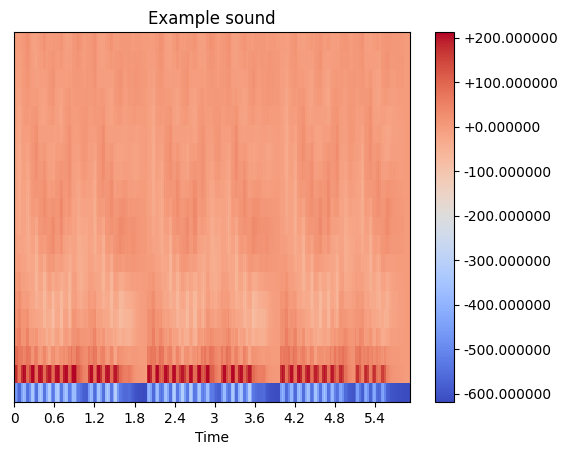

In [80]:
mfcc_example_sound = librosa.feature.mfcc(y = sounds[2])
librosa.display.specshow(mfcc_example_sound, x_axis='time',sr = srs[2])
plt.title('Example sound')
plt.colorbar(format='%+2f')
plt.show()

In [60]:
mfcc_example_sound.shape

(20, 256)

In [81]:
time_ = 4 * srs[2]    # 4 sec
trimmed_audio = sounds[2][time_:]

In [79]:
# sounds[2]

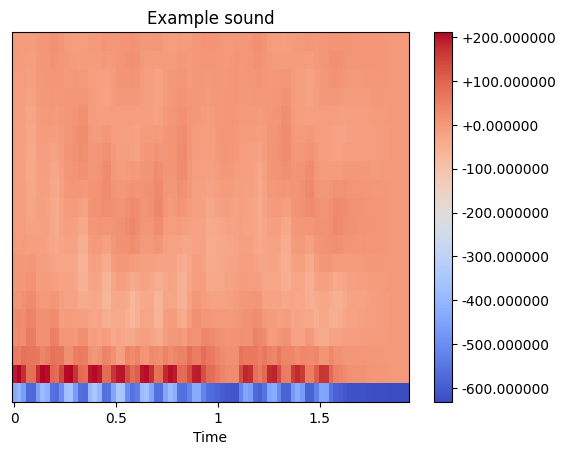

In [82]:
mfcc_trimmed_sound = librosa.feature.mfcc(y = trimmed_audio)
librosa.display.specshow(mfcc_trimmed_sound, x_axis='time',sr = srs[0])
plt.title('Example sound')
plt.colorbar(format='%+2f')
plt.show()

In [ ]:
# Periodic nature MFCC can be observed with time.
